In [1]:
from autogen.code_utils import create_virtual_env
from autogen.coding import LocalCommandLineCodeExecutor
from autogen import ConversableAgent, AssistantAgent
import os

# Setup virtual environment for code execution
venv_dir = ".venvautogen"
venv_context = create_virtual_env(venv_dir)

flaml.automl is not available. Please install flaml[automl] to enable AutoML functionalities.


In [2]:
# Configuration for the CodeExecutorAgent
executor = LocalCommandLineCodeExecutor(
    timeout=120,  # Increased timeout for potentially long-running data tasks
    work_dir="energy_data_analysis_user_defined_functions",  # Dedicated directory for energy data tasks
    virtual_env_context=venv_context,
)

# Define the model for CodingAssistantAgent
llm_config = {"model": "gpt-4o-mini"}

# Setup CodingAssistantAgent
code_writer_agent = AssistantAgent(
    name="code_writer_agent",
    llm_config=llm_config,
    code_execution_config=False,  # This agent does not execute code directly
    human_input_mode="NEVER",  # Automated, does not require human interaction
)

# Setup CodeExecutorAgent
code_executor_agent = ConversableAgent(
    name="code_executor_agent",
    llm_config=False,  # This agent does not use an LLM for generating responses
    code_execution_config={"executor": executor},
    human_input_mode="ALWAYS",
    default_auto_reply="Please continue. If everything is done, reply 'TERMINATE'.",
)

# User Defined Functions

In [3]:
# Function to collect, clean, process, and prepare the energy data
def Get_ChicagoEnergyData():
    """Data Engineer":"Responsibilities: Generate code to collect data from any source, if not found make sample data, clean.
    
    Return: prepare Chicago Energy data for 2020-2024 in a csv file name chicago_energy_data.csv.
    """
    import pandas as pd
    import numpy as np

    # Step 1: Generate sample data
    years = [2020, 2021, 2022, 2023, 2024]
    months = [f'{i:02d}' for i in range(1, 13)]

    data = []

    for year in years:
        for month in months:
            energy_consumption = np.random.randint(1000, 10000)  # random consumption values
            energy_cost = np.round(energy_consumption * np.random.uniform(0.1, 0.5), 2)  # random cost calculation
            data.append([year, month, energy_consumption, energy_cost])

    # Step 2: Create DataFrame
    df = pd.DataFrame(data, columns=['Year', 'Month', 'Energy_Consumption', 'Energy_Cost'])

    # Step 3: Data Cleaning (if needed, e.g., checking for NaN)
    df.dropna(inplace=True)  # removing any NaN values

    # Step 4: Export to CSV
    df.to_csv('chicago_energy_data.csv', index=False)
    print("Chicago Energy data for 2020-2024 has been generated and saved to 'chicago_energy_data.csv'.")

In [4]:
def Show_ChicagoEnergyData_CurrentUsage(data):
    """Generate code to visualize Chicago Energy usage for 2020-2024
    
    Args: chicago_energy_data.csv file which is in the same folder
    
    Return: plot the graph and save it as chicago_energy_consumption.png file.
    
    """
    import pandas as pd
    import matplotlib.pyplot as plt

    # Load the data
    data = pd.read_csv('chicago_energy_data.csv')

    # Filter the data for the years 2020-2024
    filtered_data = data[(data['Year'] >= 2020) & (data['Year'] <= 2024)]

    # Create a datetime index for plotting (assuming Month is in numeric format)
    filtered_data['Date'] = pd.to_datetime(filtered_data[['Year', 'Month']].assign(Day=1))

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_data['Date'], filtered_data['Energy_Consumption'], marker='o')  # Plot Energy Consumption
    plt.title('Chicago Energy Consumption (2020-2024)')
    plt.xlabel('Date')
    plt.ylabel('Energy Consumption')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Save the plot as a PNG file
    plt.savefig('chicago_energy_consumption.png')
    plt.show()

In [5]:
def Show_ChicagoEnergyData_UsageForecast(data):
    """Generate code to forecast Chicago Energy usage for 2025-2027
    
    Args: take reference from the chicago_energy_data.csv file which has data from 2020-2024 
    
    Return: plot it and save it as chicago_energy_forecast.png file.
    
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from statsmodels.tsa.arima.model import ARIMA

    # Step 1: Read the data from the CSV file
    data = pd.read_csv('chicago_energy_data.csv')

    # Create a DateTime index from 'Year' and 'Month'
    data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(Day=1))

    # Set the new Date column as the index
    data.set_index('Date', inplace=True)

    # Step 2: Resampling monthly data if necessary
    monthly_data = data['Energy_Consumption'].resample('ME').mean()

    # Step 3: Forecasting using ARIMA
    model = ARIMA(monthly_data, order=(5, 1, 0))  # Parameters may need tuning
    model_fit = model.fit()

    # Forecast for 2025-2027
    forecast = model_fit.forecast(steps=36)  # 3 years for monthly data
    forecast_index = pd.date_range(start='2025-01-01', periods=36, freq='ME')

    # Step 4: Create a plot
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_data.index, monthly_data, label='Historical Data', color='blue')
    plt.plot(forecast_index, forecast, label='Forecasted Data', color='orange')
    plt.title('Chicago Energy Usage Forecast (2025-2027)')
    plt.xlabel('Date')
    plt.ylabel('Energy Usage')
    plt.legend()
    plt.grid()
    plt.savefig('chicago_energy_forecast.png')
    plt.show()

In [6]:
executor = LocalCommandLineCodeExecutor(
    timeout=60,
    work_dir="energy_data_analysis_user_defined_functions",
    virtual_env_context=venv_context,
    functions=[Get_ChicagoEnergyData, Show_ChicagoEnergyData_CurrentUsage, Show_ChicagoEnergyData_UsageForecast],
)

In [7]:
code_writer_agent_system_message = code_writer_agent.system_message

In [8]:
code_writer_agent_system_message += executor.format_functions_for_prompt()
print(code_writer_agent_system_message)

You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
    1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
    2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feed

In [9]:
code_writer_agent = ConversableAgent(
    name="code_writer_agent",
    system_message=code_writer_agent_system_message,
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

code_executor_agent = ConversableAgent(
    name="code_executor_agent",
    llm_config=False,
    code_execution_config={"executor": executor},
    human_input_mode="ALWAYS",
    default_auto_reply=
    "Please continue. If everything is done, reply 'TERMINATE'.",
)

In [10]:
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message="Generate code to collect data from any source, if not found make sample data, clean, and prepare Chicago Energy data for 2020-2024 in a csv file name chicago_energy_data.csv.""Generate code to visualize Chicago Energy usage for 2020-2024 using the chicago_energy_data.csv file which is in the same folder and plot it and save it as chicago_energy_consumption.png file.""Generate code to forecast Chicago Energy usage for 2025-2027 can take reference from the chicago_energy_data.csv file which has data from 2020-2024 and plot it and save it as chicago_energy_forecast.png file."
)

code_executor_agent (to code_writer_agent):

Generate code to collect data from any source, if not found make sample data, clean, and prepare Chicago Energy data for 2020-2024 in a csv file name chicago_energy_data.csv.Generate code to visualize Chicago Energy usage for 2020-2024 using the chicago_energy_data.csv file which is in the same folder and plot it and save it as chicago_energy_consumption.png file.Generate code to forecast Chicago Energy usage for 2025-2027 can take reference from the chicago_energy_data.csv file which has data from 2020-2024 and plot it and save it as chicago_energy_forecast.png file.

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

Let's break down your request into three steps:

1. **Collect and prepare the Chicago Energy data for 2020-2024 in a CSV file named `chicago_energy_data.csv`.**
2. **Visualize the Chicago Energy usage for 2020-2024 using the created CSV file and save th

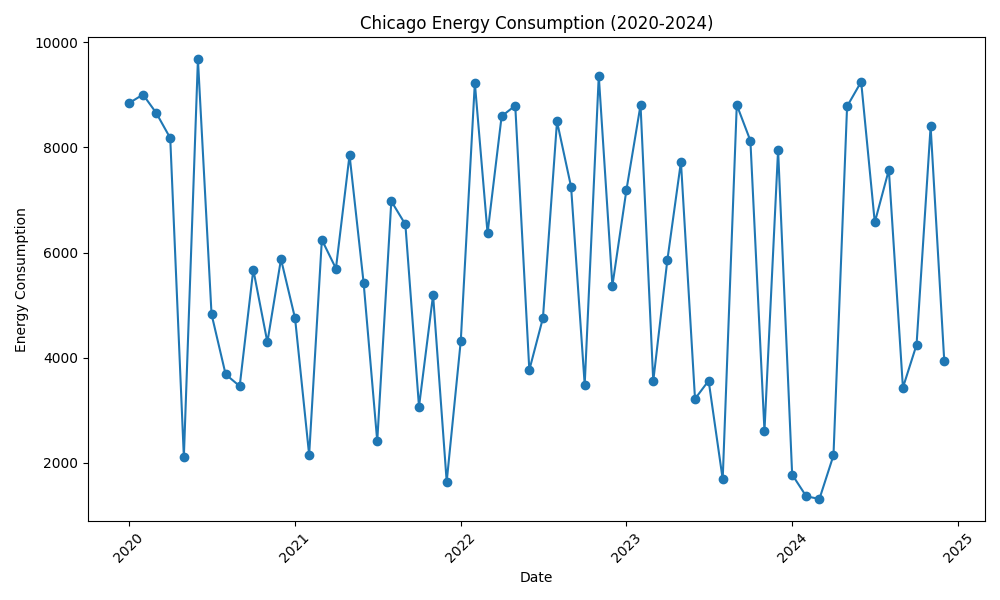

In [11]:
import os
from IPython.display import Image

Image(os.path.join("energy_data_analysis_user_defined_functions", "chicago_energy_consumption.png"))

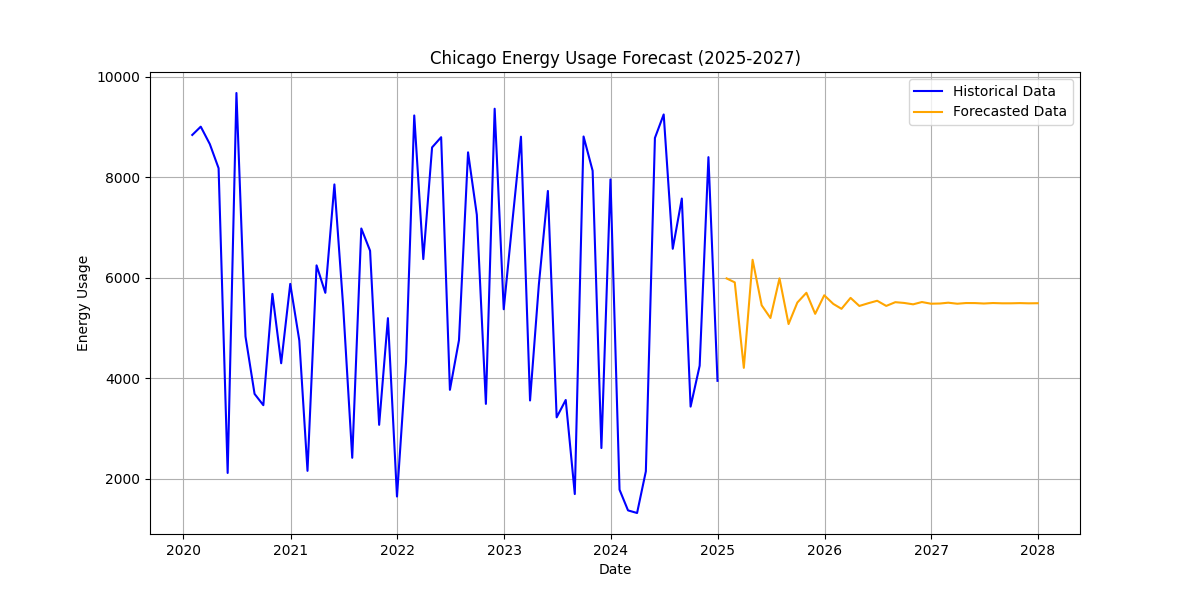

In [12]:
Image(os.path.join("energy_data_analysis_user_defined_functions", "chicago_energy_forecast.png"))